<link rel="stylesheet" href="estilo.css">

<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Pré-Processamento de Dados
    
---

# Conteúdo

Pré-processamento de dados quantiativos e qualitativos

- Limpeza de dados
- Transformação de dados
    - Normalização de dados numéricos
    - Discretização de dados numéricos
    - Transformação de dados qualitativos em quantiativos
    - Outras transformações de dados
- Tratamento de dados desconhecidos

# Limpeza de dados

- A maior parte dos conjuntos de dados disponíveis para estudo, bem como os obtidos a partir de processos de coleta de dados, podem apresentar problemas, os quais dificultam a utilização desses dados em processos de mineração.

- Esses problemas pode ser: erros de digitação, erro na leitura de dados por sensores.

- Muitos dos processos de mineração aplicados não são usados apenas para estudo, mas os padrões encontrados podem ser usados em processos de mineração de dados. Por esse fato, é extremente importante a limpeza desses dados.

## Baseada em Conhecimento do domínio
- Uma estratégia para fazer limpeza de dados é **utilizar conhecimento do domínio**
- Determinados valores numéricos podem estar fora de um intervalo definido, conhecido do domínio.

- Um atributo idade deve conter valores entre 0 e 120 para domínio do problema. Se algum valor desse atributo está fora desse intervalo, temos que tomar uma decisão sobre ele: deixar ele como desconhecido (símbolo ?, ou NA no R), escolher algum valor para ele, ou tentar encontrar o valor verdadeiro baseado em outros atributos ou instâncias.

In [1]:
idades <- c(10,20,34,25,50,165,71,55,30,34)
idades <- ifelse( (idades < 0 | idades > 120), NA, idades)
print(idades)

 [1] 10 20 34 25 50 NA 71 55 30 34


- Um atributo de data deve conter valores de data maiores do que 01/01/2010. Se algum valor desse atributo for menor do que essa data também tamos que tomar uma decisão.

## Baseado em dados estatísticos
- Outra estratégia consiste em **utilizar estatística** para conhecer a distribuição dos dados e assim tomar decisões sobre quais valores estão fora do intervalo esperado.
- Ema variável contínua pode apresentar outliers estatísticos (pontos fora da curva) e se essa variável tem uma distribuição conhecida podemos tomar alguma decião sobre o que fazer com esses valores: como deixar ele como desconhecido ou substituído pelo valor esperado (média).

- Por exemplo, um atributo de temperatura possui um valor de média de 25 graus com desvio padrão de 2 graus. 
- Considerando uma distribuição normal espera-se que $68.25\%$ estejam a uma unidade de desvio-padrão e $99.73\%$ a três unidades.
- Se encontrar um valor acima de unidades de desvio padrão, por exemplo, 32 graus, podemos tomar alguma decisão com esse valor.

In [3]:
temperatura <- c(26.6, 27.8, 25.6, 26.2, 33.0, 20.4, 29.4, 24.4, 26.9, 26.7)
media <- 26
desvio <- 2
temperatura <- ifelse( ( abs(temperatura - media)/desvio ) > 3, media, temperatura)
print(temperatura)

 [1] 26.6 27.8 25.6 26.2 26.0 20.4 29.4 24.4 26.9 26.7


# Transformação de Dados

## Normalização de Dados Numéricos (ou Contínuos)

- A motivação da normalização é minimzar o problema da presença de variáveis em um conjunto de dados com dispersões de dados muito diferentes.

- Vários algoritmos de aprendizado como Redes Neurais, Vizinhos mais Próximos e K-médias podem ser prejudicados por essa dispersão. 

- Por exemplo, se medimos a distância entre dois usários pela diferença entre seus valores temos:
    - Usuário 1 (salario = 1000, poupança = 20000)
    - Usuário 2 (salario = 1500, poupança = 50000)
    - Diferença  (salario = 500, poupança 30000), Total (30500)
    - O problema que observamos é que a variável salário contribui muito menos para a soma das distâncias do que a variável poupança. 

- O objetivo da normalização é ajustar a escala dos valores dos atributos para que tenha dispersões ou intervalos mais similares.
- Métodos para normalização de dados numéricos:
    - Linear
    - Desvio-padrão
    - Valor máximo
    - Escala decimal

### Normalização Linear

- A normalização linear consiste em manter os dados no intervalo $[0,1]$. Para isso, uma função de transformação linear.

$$ f(x) = \frac{x - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})} = x'$$

- onde,
    - $\mathbf{x}$ é o conjunto de valores da variável
    - $x$ é um valor da variável
    - $x'$ é o valor da variável transformado

### Normalização por Desvio-Padrão (z-score)

- A normalização desvio-padrão consiste em transformar os dados em unidades de desvio padrão em relação à média. Para isso, uma função de transformação baseada em média e desvio padrão.

$$ f(x) = \frac{x - mean(\mathbf{x})}{sd(\mathbf{x})} = x'$$

- onde, 
    - $\mathbf{x}$ é o conjunto de valores da variável
    - $x$ é um valor da variável
    - $x'$ é o valor da variável transformado
    - $mean$ e $sd$ são a média e o desvio padrão dos valores

### Normalização de Valor Máximo

- A normalização usando o valor máximo consiste em manter os dados no intervalo $[-1,1]$. Para isso, uma função de transformação

$$ f(x) = \frac{x}{max(|\mathbf{x}|)} = x'$$

- onde, 
    - $\mathbf{x}$ é o conjunto de valores da variável
    - $x$ é um valor da variável
    - $x'$ é o valor da variável transformado

### Normalização por Escala Decimal

- A normalização usando o valor por escala decimal consiste em manter os dados no intervalo $[-1,1]$. Para isso, uma função de transformação

$$ f(x) = \frac{x}{10^j} = x'$$

- onde, 
    - $\mathbf{x}$ é o conjunto de valores da variável
    - $x$ é um valor da variável
    - $x'$ é o valor da variável transformado
    - $j$ é o menor inteiro tal que $max(|\mathbf{x}|) \leq 10^j$

### Exemplo no conjunto de dados Economics

In [25]:
library(ggplot2)
library(data.table)
options(repr.plot.width=7, repr.plot.height=3)

- Visualização das variáveis *pop* e *unemploy* sem normalização

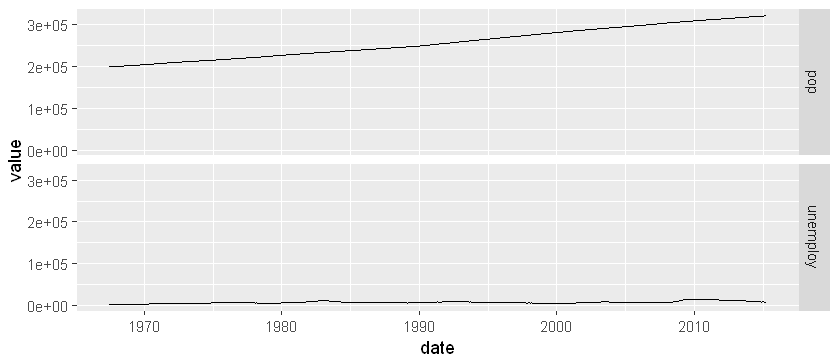

In [29]:
dt <- data.table(economics)[,.(date,pop,unemploy)]
dt.melt <- melt(dt, id.vars=c("date")) 
ggplot(dt.melt, aes(x = date, y = value)) + geom_line() + facet_grid(variable ~ .)

- Com a normalização das variáveis *pop* e *unemploy*

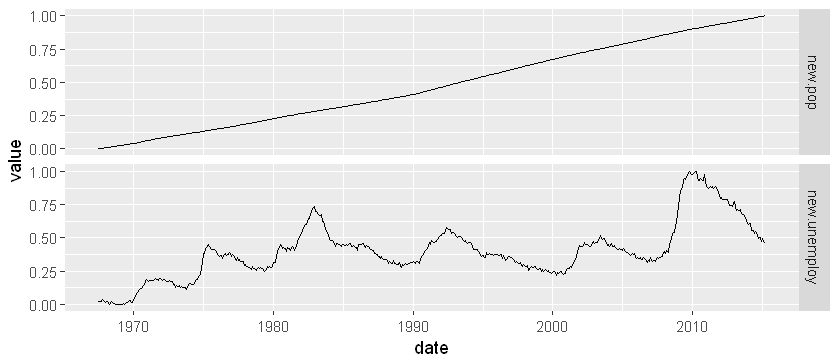

In [30]:
dt.new <- dt[,.(date, 
            new.pop = (pop - min(pop))/(max(pop)-min(pop)), 
            new.unemploy = (unemploy - min(unemploy))/(max(unemploy)-min(unemploy)) )]

dt.new.melt <- melt(dt.new, id.vars=c("date")) 
ggplot(dt.new.melt, aes(x = date, y = value)) + geom_line() + facet_grid(variable ~ .)

- Separando a função de normalização em uma *function* do R

In [34]:
transformacao.linear <- function (x){
    new.x <- (x - min(x)) / (max(x)-min(x))
    new.x
}

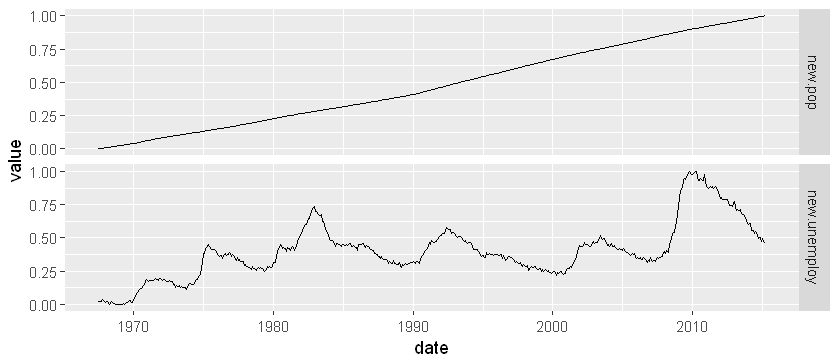

In [37]:
dt.new <- dt[,.(date, 
            new.pop = transformacao.linear(pop), 
            new.unemploy = transformacao.linear(unemploy) )]

dt.new.melt <- melt(dt.new, id.vars=c("date")) 

ggplot(dt.new.melt, aes(x = date, y = value)) +
    geom_line() + 
    facet_grid(variable ~ .)

### Atividade

- Com o conjunto de dados *economics*, para cada atributo do conjunto de dados faça:
    1. Normalização Linear
    - Normalização por Desvio-padrão
    - Normalização por Valor Máximo
    - Normalização por Escala Decimal

## Discretização de Dados Numéricos

- Alguns algoritmos de aprendizado trabalham apenas com dados discretos (ou categóricos), como o ID3 (Iterative Dichotomiser 3) desenvolvido por Ross Quinlan em 1986. Isto é, ao invés de utilizar o valor de, por exemplo, altura em metros ou centímetros, utilizam os valores baixo, médio, alto.

- Outros algoritmos podem ter desempenho melhor em alguns problemas se usada a representação discretazada de uma variável contínua, como no caso do algoritmo Naïve Bayes.

- Em algumas ocasiões o armazenamento de dados é feito com valores numéricos, embora indiquem informações discretas, por exemplo um atributo gênero, onde o valor 0 indica masculino, 1 feminino e 2 outro.

- O objetivo da discretização consiste em transformar de valores numéricos para categóricos ou discretos.

- A idéia é perder a menor quantidade de informação possível para o domínio do problema, durante esse processo.

- As principais abordagens são:
    - Mapeamento Direto
    - Mapeamento em Intervalos

### Mapeamento Direto

- Neste tipo de discretização ocorre a substituição de valores numéricos por valores categóricos conhecidos no domínio do problema.

- Como o exemplo citado anteriormente, o atributo gênero pode ser armazenado como um valor numérico e o mesmo deve ser transformado, com o objetivo que, tanto as técnicas visualização, quanto os algoritmos de aprendizado não entendam esse atributo como numérico e sim como discreto.

- Exemplos de três formas de fazer discretização em R:

In [158]:
# Geração de uma amostra de variável aleatória sexo, de tamanho 20, com valores 0, 1, e 2
genero <- sample(x = c(0,1,2), size = 20, replace = T)
print(genero)

 [1] 1 2 1 0 0 0 0 1 1 1 2 0 1 0 1 0 1 2 0 2


In [159]:
# Conversão dos dados numéricos para discretos (Forma 1)
genero.discreto1 <- factor(genero)
levels(genero.discreto1) <- c("Masculino", "Feminino","Outros")
print(genero.discreto1)

 [1] Feminino  Outros    Feminino  Masculino Masculino Masculino Masculino
 [8] Feminino  Feminino  Feminino  Outros    Masculino Feminino  Masculino
[15] Feminino  Masculino Feminino  Outros    Masculino Outros   
Levels: Masculino Feminino Outros


In [160]:
# Conversão dos dados numéricos para discretos (Forma 2)
genero.discreto2 <- genero
genero.discreto2 <- ifelse( genero.discreto2 == 0, 'Masculino', genero.discreto2 )
genero.discreto2 <- ifelse( genero.discreto2 == 1, 'Feminino', genero.discreto2 )
genero.discreto2 <- ifelse( genero.discreto2 == 2, 'Outros', genero.discreto2 )
genero.discreto2 <- as.factor(genero.discreto2)
print(genero.discreto2)

 [1] Feminino  Outros    Feminino  Masculino Masculino Masculino Masculino
 [8] Feminino  Feminino  Feminino  Outros    Masculino Feminino  Masculino
[15] Feminino  Masculino Feminino  Outros    Masculino Outros   
Levels: Feminino Masculino Outros


In [161]:
# Conversão dos dados numéricos para discretos (Forma 3)
genero.discreto3 <- genero
genero.discreto3 <- gsub('0', 'Masculino', genero.discreto3)
genero.discreto3 <- gsub('1', 'Feminino', genero.discreto3)
genero.discreto3 <- gsub('2', 'Outros', genero.discreto3)
genero.discreto3 <- as.factor(genero.discreto3)
print(genero.discreto3)

 [1] Feminino  Outros    Feminino  Masculino Masculino Masculino Masculino
 [8] Feminino  Feminino  Feminino  Outros    Masculino Feminino  Masculino
[15] Feminino  Masculino Feminino  Outros    Masculino Outros   
Levels: Feminino Masculino Outros


### Mapeamento em Intervalos

- Intervalos pré-definidos
- Intervalos de igual tamanho
- Intervalos de igual frequência

#### Intervalos Pré-definidos

- Neste tipo de intervalo, coleta-se informação do domínio para poder realizar a discretização

- Por exemplo, ao discretizar valores de idade em faixas etárias, embora possamos definir os intervalos arbitrariamente (nós mesmos) existe conhecimento do domínio que permite definir esses intervalos.
    - Criança (de 0 a 12 anos incompletos)
    - Adolescente (de 12 anos a 18 anos incompletos)
    - Adulto Jovem (de 18 anos a 40 anos incompletos)
    - Adulto (de 40 anos a 60 anos incompletos)
    - Idoso (de 60 anos ou mais)

In [37]:
# Geração de uma amostra de variável aleatória idade, de tamanho 20, com valores de 0 a 100
set.seed(1)
idade <- sample(x = c(0:100), size = 20, replace = T)
print(idade)

 [1]  26  37  57  91  20  90  95  66  63   6  20  17  69  38  77  50  72 100  38
[20]  78


In [42]:
idade.intervalos <- idade
idade.intervalos <- ifelse(idade.intervalos < 12, "criança",
                        ifelse(idade.intervalos < 18, "adolescente",
                        ifelse(idade.intervalos < 40, "adulto jovem",
                        ifelse(idade.intervalos < 60, "adulto", "idoso"))))
idade.intervalos <- as.factor(idade.intervalos)
print(idade.intervalos)

 [1] adulto jovem adulto jovem adulto       idoso        adulto jovem
 [6] idoso        idoso        idoso        idoso        criança     
[11] adulto jovem adolescente  idoso        adulto jovem idoso       
[16] adulto       idoso        idoso        adulto jovem idoso       
Levels: adolescente adulto adulto jovem criança idoso


### Intervalos de Igual Tamanho (ou largura fixa)

- Ao se conhecer os valores máximos e mínimos do domínio de uma variável, seja por conhecimento do domínio ou pela aplicação de técnicas estatísticas, podemos dividir o intervalo total dos dados em $k$ tamanhos iguais.

$$L = \frac{max(\mathbf{x}) - min(\mathbf{x}) + 1}{k}$$

- onde, 
    - $\mathbf{x}$ é o conjunto de valores da variável    
    - $k$ é o número de intervalos
    - $L$ é a largura do intervalo

- Por exemplo, se os valores vão de 1 a 100 e queremos dividir esses vem valores em 4 intervalos de tamanho igual, o tamanho do intervalo é 25, pois $\frac{(1-100+1)}{4} = 25$

- Assim, os intervalos podem ser definidos da seguinte por,

$$ I_i = [(min(\mathbf{x}) + L \times i),\;(min(\mathbf{x}) + L \times (i+1) - 1],\\ \text{para}\;1 \leq i < k $$

- O que resulta nos seguintes intervalos de 1 a 100

$$ 
 \begin{matrix}
  I_0 =& [(1 + 25 \times 0),(1 + 25 \times (0+1) - 1)]) =& [1,25] \\
  I_1 =& [(1 + 25 \times 1),(1 + 25 \times (1+1) - 1)]) =& [26,50] \\
  I_2 =& [(1 + 25 \times 2),(1 + 25 \times (2+1) - 1)]) =& [51,75] \\
  I_3 =& [(1 + 25 \times 3),(1 + 25 \times (3+1) - 1)]) =& [76,100] \\
  \end{matrix}
$$

- Em R podemos fazer isso utilizando *ifelse*, mas também podemos usar a operação de divisão de inteiros, como segue:

In [143]:
set.seed(1)
idade <- sample(x = c(1:100), size = 500, replace = T)
print(head(idade))

[1] 27 38 58 91 21 90


In [144]:
k <- 4
L <- (max(idade) + min(idade) - 1) / k
idade.intervalos <- (idade - min(idade)) %/% L
print(head(idade.intervalos))

[1] 1 1 2 3 0 3


In [137]:
library(data.table)
dt <- data.table(idade,idade.intervalos)
head(dt)

idade,idade.intervalos
27,1
37,1
57,2
89,3
20,0
86,3


#### Intervalos de Igual Frequência

- Neste tipo de discretização a ideia consiste em manter o mesmo número de valores (ou exemplos) em cada intervalo.

- Considerando $k$ o número de intervalos e $n$ o número de exemplos:
    1. Calculamos $N$, o número de exemplos por intervalo, como $N = \frac{n}{k}$
    - Calculamos o ranking dos valores da variável $\mathbf{x}$ 
    - Aplicamos o método de discretização de igual tamanho sobre o ranking dos elementos

- Exemplo,

In [147]:
set.seed(1)
idade <- sample(x = c(1:100), size = 50, replace = F)
print(head(idade))

[1] 27 37 57 89 20 86


In [148]:
k <- 5
N <- round(length(idade) / k)

x <- rank(idade)
L <- (max(x) + min(x) - 1) / k
x.intervalos <- (x - min(x)) %/% L

print(head(x.intervalos))

[1] 1 2 3 4 0 4


In [154]:
dt <- data.table(idade, rank = x, intervalo = x.intervalos)
head(dt)

idade,rank,intervalo
27,14,1
37,21,2
57,31,3
89,49,4
20,10,0
86,46,4


In [155]:
dt[, .N ,by = intervalo]

intervalo,N
1,10
2,10
3,10
4,10
0,10


## Transformação de Dados Qualitativos em Quantitativos

- Alguns algoritmos tem preferência por representações numéricas para atributos qualitativos, como as Redes Neurais.

- Os atributos qualitativos (ou categóricos) podem ser:
    - Ordinais: os seus valores possuem uma ordem, como avaliação: ruim, regular, bom e ótimo.
    - Nominais: os seus valores não possuem uma ordem, como cores, estado civil, e outros.

### Mapeamento Direto
- Para atributos nominais não é recomendado, pois pode inserir informações incorretas para o processo de aprendizado.
- Para os atributos ordinais é possível transformar os dados para números inteiros.
- Para isso, ordenamos os possíveis valores em ordem crescente, e atribuímos valores em ordem crescente aos possíveis valores, geralmente iniciando em 0 ou 1.
- Por exemplo, para a variável avaliação

|Valor | Mapeamento |
|------|------|
| ruim | 0 |
| regular | 1 |
| bom | 2 | 
| ótimo | 3 |

### Representação Binária

- Neste tipo de representação cada valor corresponde a uma sequência binária única.

- Em geral, usa-se a representação *One-Hot* que ativa um bit exclusivamente para cada valor da variável.

- Por exemplo, para o caso da variável ordinal *avaliação*:

|Valor | Mapeamento |
|------|------|
| ruim | 0001 |
| regular | 0010 |
| bom | 0100 | 
| ótimo | 1000 |

- Por exemplo, para a variável nominal *estado civil*:

|Valor | Mapeamento |
|------|------|
| casado | 00001 |
| solteiro | 00010 |
| viúvo | 00100 | 
| divorciado | 01000 |
| outro | 10000 |

- A representação binária é comumente utilizada para codificar variáveis em Redes Neurais.

### Outras Transformações de Dados

- Existem outras transformações dependentes da natureza do dado e da informação que queremos estudar.

- Por exemplo, se temos uma variável *data de nascimento*. Se estamos interessados em analisar o valor da idade, a data de nascimento não será suficiente para um método de aprendizado entender o que nós queremos.

In [368]:
set.seed(1)
data.nasc <- sample(seq(as.Date('1950/01/01'), as.Date('2010/01/01'), by="day"), 20)
print(head(data.nasc))

[1] "1965-12-06" "1972-04-30" "1984-05-15" "2004-06-27" "1962-02-06"
[6] "2003-11-23"


In [369]:
library(lubridate)
today <- Sys.Date()
age <- time_length( today - data.nasc, "years")
age <- floor(age) # Arredondamento pelo menor inteiro
head(data.table(data.nasc, idade = age))

data.nasc,idade
1965-12-06,52
1972-04-30,46
1984-05-15,34
2004-06-27,14
1962-02-06,56
2003-11-23,14


- A data é um tipo de dado complexo, pois tem várias informações contidas nela.

- Os algoritmos de aprendizado também não irão saber que nela estão contidos: dia, mês e ano.

- E muito menos se o mês deve ser representado no formato textual, número inteiro ou representação binária. Portanto, nós devemos informar que tipo de informação queremos representar.

- Como já mencionado, os dados podem vir em qualquer formato, e como vão ser usados esses dados para visualização ou por algoritmo de aprendizado, vai depender de quem está realizando o processo de mineração.

- Então muitas vezes vamos precisar extrair todas essas informações do dado complexo

In [370]:
dt <- data.table(data.nasc, 
                 dia.do.mes = mday(data.nasc), 
                 dia.da.semana = wday(data.nasc), 
                 dia.da.semana.extenso = wday(data.nasc, label = T), 
                 mes = month(data.nasc), 
                 mes.extenso = month(data.nasc, label = T), 
                 ano = year(data.nasc))
head(dt,5)

data.nasc,dia.do.mes,dia.da.semana,dia.da.semana.extenso,mes,mes.extenso,ano
1965-12-06,6,2,Mon,12,Dec,1965
1972-04-30,30,1,Sun,4,Apr,1972
1984-05-15,15,3,Tue,5,May,1984
2004-06-27,27,1,Sun,6,Jun,2004
1962-02-06,6,3,Tue,2,Feb,1962


## Tratamento de Dados Desconhecidos

- Um problema comum em conjunto de dados é a presença de dados desconhecidos

- Geralmente sinalizados com: ?, NA, ou a ausência de valor mesmo

- Algumas abordagens comuns:
    - Eliminar o exemplo que possui o valor desconhecido
    - Substituir o valor de uma variável pelo seu valor esperado de acordo com sua distribuição. Geralmente média ou moda.
    - Verificar qual é o exemplo mais parecido no conjunto de dados, em relação aos outros atributos, e usar o valor do exemplo mais parecido


- Uma abordagem mais sofisticada é efetuar um aprendizado supervisionado sobre esse atributo para aprender sua relação com os outros atributos.
    - Modelo de classificação, quando o atributo com valor desconhecido é categórico.
    - Modelo de regressão, quando o atributo com valor desconhecido é numérico.
- Após, usa-se o modelo para predizer o valor desconhecido.
- Por exemplo, no conjunto de dados *iris*, vamos retirar 10 valores de *Sepal.Length*

In [371]:
set.seed(1)
desconhecidos <- sample( x = 1:nrow(iris), size = 10, replace = F)
print(desconhecidos)

 [1]  40  56  85 134  30 131 137  95  90   9


In [372]:
my.iris <- data.table(iris)[,.(Sepal.Length,Sepal.Width,Petal.Length,Petal.Width)]
my.iris$Sepal.Length[desconhecidos] <- NA

- Construímos um modelo preditivo para o atributo *Sepal.Length*

In [373]:
model <- lm(Sepal.Length ~ ., data = my.iris[-desconhecidos])

- Usamos esse modelo para predizer os valores desconhecidos de *Sepal.Length* 

In [374]:
predicted <- predict(model, my.iris[desconhecidos,])

- Comparamos os valores preditos com os observados

In [375]:
observed <- iris$Sepal.Length[desconhecidos]
results <- data.table(predicted, observed)
head(results,5)

predicted,observed
5.034053,5.1
6.158224,5.7
6.179538,5.4
6.470971,6.3
4.975430,4.7


- Verificamos se o nosso modelo foi melhor do que um modelo de substituição pela média

In [376]:
mean.predictor <- mean(my.iris$Sepal.Length[-desconhecidos])

dt <- results[,.(observed, error.my.predictor = observed - predicted, error.mean.predictor = observed - mean.predictor)]

dt[,.(EMQ.my.predictor   = mean(error.my.predictor^2  ), 
      EMQ.mean.predictor = mean(error.mean.predictor^2) )]

EMQ.my.predictor,EMQ.mean.predictor
0.1456242,0.7238617


- Isso indica que o Erro Médio Quadrático (EMQ) do preditor reduziu o erro da média de 0.72 para 0.15. 

- Podemos caluclar a redução de erro relativa:

$$\frac{0.72-0.15}{0.72} = 0.79$$

- E verificar uma redução de erro de $79\%$ usando o nosso modelo, em relação a usar apenas o valor da média

- Entre essas duas abordagens, a utilização de nosso modelo preditivo é preferível para preencher os dados desconhecidos no conjunto de dados, embora exista um EMQ de $0.15$.